In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
veri= pd.read_csv("/content/drive/MyDrive/veri/athlete_events.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


veri hakkında bilgi ve verinin temizlenmesi

In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [7]:
#id veri hakkında bilgi vermediği için temizlenmelidir. 
#oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilebilir.

veri=veri.drop(["ID", "Games"], axis=1) #axis=1 sütun 
veri.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


kayıp veri 

In [8]:
essiz_etkinlik= pd.unique(veri.Event)
print("essiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]


essiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [9]:
veri_gecici= veri.copy()# gerçek veriyi bozmamak için bir kopyasını oluşturduk
boy_kilo_liste= ["Height","Weight"]
for e in essiz_etkinlik:
  etkinlik_filtre= veri_gecici.Event==e
  veri_filtreli=veri_gecici[etkinlik_filtre]

  for s in boy_kilo_liste:
    ortalama = np.round(np.mean(veri_filtreli[s]),2)
    if ~np.isnan(ortalama):
      veri_filtreli[s]= veri_filtreli[s].fillna(ortalama)
    else:
      tum_veri_ortalamasi= np.round(np.mean(veri[s]),2)
      veri_filtreli[s]= veri_filtreli[s].fillna(tum_veri_ortalamasi)
  veri_gecici[etkinlik_filtre]= veri_filtreli

veri=veri_gecici.copy()
veri.info()      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


yaş sütunu veri doldurma

In [10]:
yas_ortalamasi=np.round(np.mean(veri.Age),2)
print("yas ortalamasi : {}".format(yas_ortalamasi))
veri["Age"]=veri["Age"].fillna(yas_ortalamasi)
veri.info()

yas ortalamasi : 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


madalya alamayanları veri setinden çıkartalım


In [11]:
madalya_degiskeni=veri["Medal"]
pd.isnull(madalya_degiskeni).sum()

231333

In [12]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri= veri[madalya_degiskeni_filtresi]
veri.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [13]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Sex     39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [14]:
#sonradan kullanabilmek için veriyi kaydedelim
veri.to_csv("olimpiyatlar_temizlenmis.csv", index =False)

tek değişkenli veri analizi


In [16]:
def plotHistogram(degisken):
  # girdi: degisken/sütun ismi çıktı: ilgili değişkenin histogramı

  plt.figure()
  plt.hist(veri[degisken],bins=85, color= "orange")
  plt.xlabel(degisken)
  plt.ylabel("frekans") 
  plt.title("Veri Sıklığı - {}".format(degisken))
  plt.show()
  

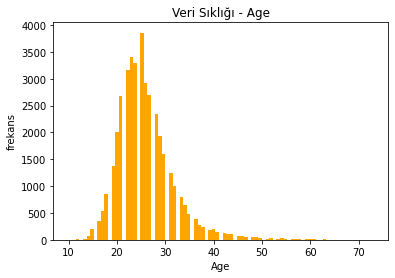

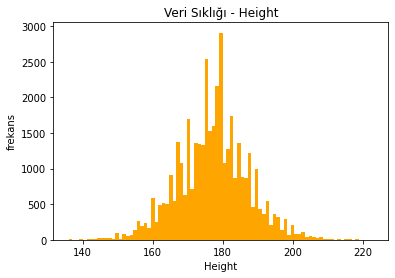

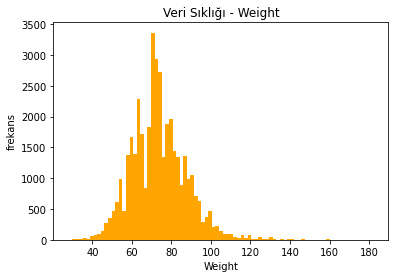

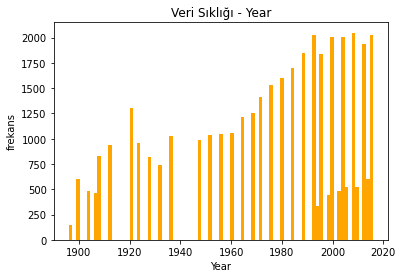

In [17]:
sayisal_degisken= ["Age", "Height", "Weight","Year"]
for i in sayisal_degisken:
  plotHistogram(i)

In [18]:
veri.describe()

,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


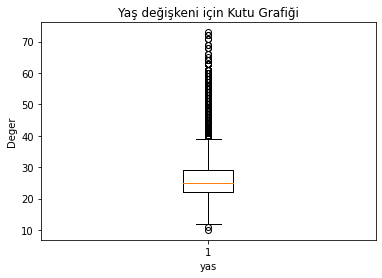

In [19]:
plt.boxplot(veri.Age)
plt.title("Yaş değişkeni için Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("Deger")
plt.show()

In [25]:
def plotBar(degisken, n=5):
  veri_= veri[degisken]
  veri_sayma=veri_.value_counts()
  veri_sayma= veri_sayma[:n]
  plt.figure()
  plt.bar(veri_sayma.index,veri_sayma, color="orange")
  plt.xticks(veri_sayma.index, veri_sayma.index.values)
  plt.xticks(rotation=45)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı -{}".format(degisken))
  plt.show()
  print("{}: \n {}". format(degisken, veri_sayma))


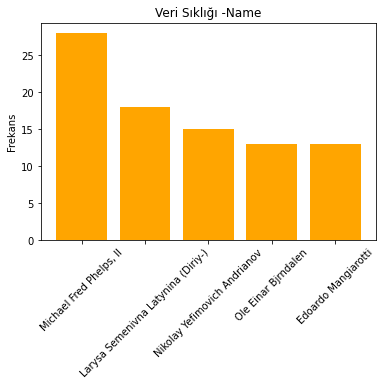

Name: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: Name, dtype: int64


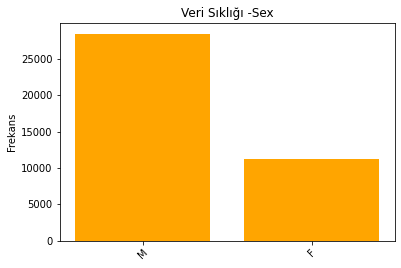

Sex: 
 M    28530
F    11253
Name: Sex, dtype: int64


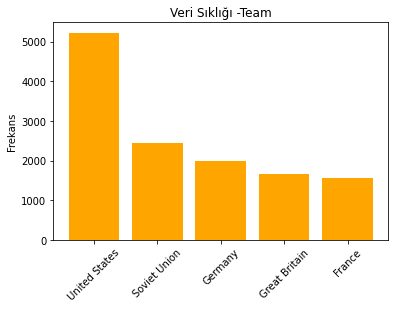

Team: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: Team, dtype: int64


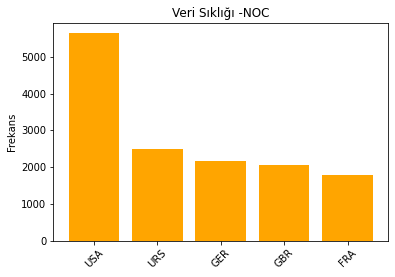

NOC: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: NOC, dtype: int64


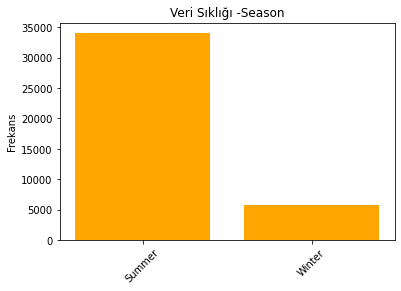

Season: 
 Summer    34088
Winter     5695
Name: Season, dtype: int64


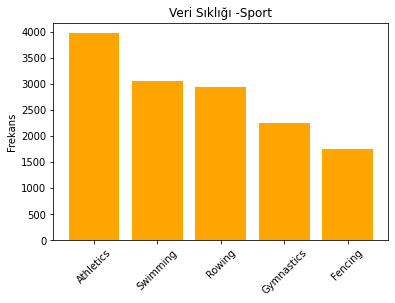

Sport: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: Sport, dtype: int64


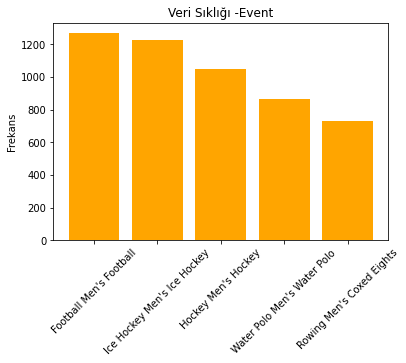

Event: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: Event, dtype: int64


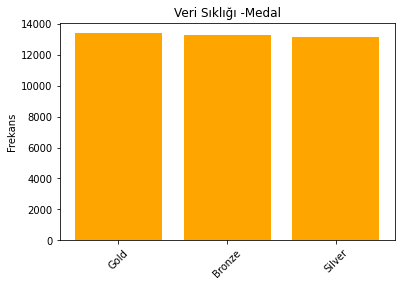

Medal: 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [26]:
kategorik_degisken= ["Name","Sex","Team","NOC", "Season","Sport", "Event", "Medal"]
for i in kategorik_degisken:
  plotBar(i)



*   Olimpiyat tarihi boyunca en çok madalya kazanan isim Micheal Phelps'dir.

*   Kadın ve erkek yarışmacılar arasında yaklaşık 1:2 oranı görülmektedir.



*   Takımlar olarak en çok ABD katılmıştır.
*   Beklendiği gibi uok ve takım çıktıları aynıdır.


*   Yaz sezonunda düzenlenen olimpiyat sayısı kış sezonunda düzenlenenden fazladır.


*   Olimpiyatlar en çok Londra'da düzenlenmiştir.
*   Olimpiyatlarda en çok atletizm branşında yarışma düzenlenmiştir.


*   Erkekler futbol müsabakaları en çok etkinliktir.













İki Değişkenli Veri Analizi

In [28]:
erkek = veri[veri.Sex== "M"]
erkek.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [30]:
kadin = veri[veri.Sex== "F"]
kadin.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


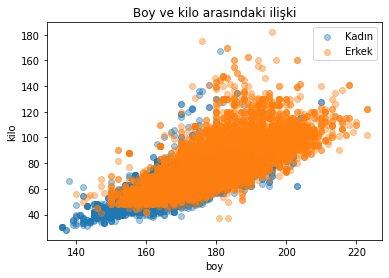

In [32]:
plt.figure()
plt.scatter(kadin.Height, kadin.Weight, alpha=0.4, label="Kadın")
plt.scatter(erkek.Height, erkek.Weight, alpha=0.4, label="Erkek")
plt.xlabel("boy")
plt.ylabel("kilo")
plt.title("Boy ve kilo arasındaki ilişki")
plt.legend()
plt.show()

Boy ve ağırlık arasında pozitif ilişki vardır.

In [33]:
veri.loc[:,["Age","Height","Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.061890,0.136349
Height,0.061890,1.000000,0.794368
Weight,0.136349,0.794368,1.000000


In [39]:
veri_gecici= veri.copy()
veri_gecici= pd.get_dummies(veri_gecici, columns=['Medal'])
veri_gecici.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [41]:
veri_gecici.loc[:,["Age","Medal_Bronze","Medal_Gold","Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [46]:
veri_gecici[["Team","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Team"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
462,United States,1233.0,2474.0,1512.0
403,Soviet Union,677.0,1058.0,716.0
165,Germany,678.0,679.0,627.0
215,Italy,484.0,535.0,508.0
171,Great Britain,572.0,519.0,582.0
149,France,577.0,455.0,518.0
420,Sweden,507.0,451.0,476.0
198,Hungary,365.0,432.0,330.0
67,Canada,408.0,422.0,413.0
117,East Germany,263.0,369.0,309.0


In [47]:
veri_gecici[["City","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["City"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,1214.0,1215.0,1195.0
3,Athina,860.0,883.0,859.0
18,Los Angeles,706.0,726.0,691.0
6,Beijing,710.0,671.0,667.0
27,Rio de Janeiro,703.0,665.0,655.0
38,Sydney,680.0,663.0,661.0
4,Atlanta,629.0,608.0,605.0
5,Barcelona,604.0,559.0,549.0
33,Seoul,549.0,520.0,513.0
2,Antwerpen,367.0,493.0,448.0


In [48]:
veri_gecici[["Sex","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Sex"],as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,Sex,Medal_Bronze,Medal_Gold,Medal_Silver
1,M,9524.0,9625.0,9381.0
0,F,3771.0,3747.0,3735.0


Çok Değişkenli Veri Analizi

In [53]:
veri_pivot = veri.pivot_table(index="Medal", columns="Sex",
                             values= ["Height","Weight","Age"],
                             aggfunc={"Height": np.mean,"Weight":np.mean,"Age":[min,max,np.std]})
veri_pivot.head()

Age                                            Height              \
         max         min             std                  mean               
Sex        F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           Weight             
             mean             
Sex             F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

Anomali Tespiti


*   Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir; İkincisi bazen veri kümesinden çıkarılır. Bir aykırı değer istatiksel analizlerde ciddi sorunlara yol açabilir. 
*   IQR= q3-q1




*   1.5xIQR








In [79]:
def anomaliTespiti(df, ozellik):
  outlier_indices= []

  for c in ozellik:
    # 1. ceyrek
    Q1= np.percentile(df[c],25)
    # 3. çeyrek 
    Q3= np.percentile(df[c],75)
    # IQR = Inter Quartile Range
    IQR = Q3-Q1
    # aykırı değerler için ek adım miktarı
    outlier_step= 1.5 *  IQR
    # aykırı değerleri ve bulunduğu indeksi tespit edelim.
    outlier_list_col= df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # tespit edilen indeksleri depolayalım 
    outlier_indices.extend(outlier_list_col)
  # essiz aykırı değerleri bulalım: 
  outlier_indices = Counter(outlier_indices)
  # eger bir örnek v adet sütunda farklı değer ise bunu aykırı değer kabul edelim
  multiple_outliers= list(i for i, v in outlier_indices.items() if v > 1 )
  return multiple_outliers


In [80]:
veri_anomali = veri.loc[anomaliTespiti(veri,["Age","Weight", "Height"])]
veri_anomali.Sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: Sport, dtype: int64

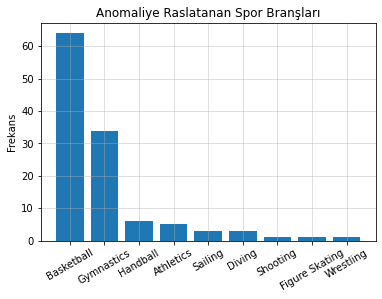

In [81]:
plt.figure()
plt.bar(veri_anomali.Sport.value_counts().index, veri_anomali.Sport.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye Raslatanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.5)
plt.show()

In [83]:
veri_gym= veri_anomali[veri_anomali.Sport== "Gymnastics"]
veri_gym

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [84]:
veri_gym.Event.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: Event, dtype: int64

In [86]:
veri_basketbol=veri_anomali[veri_anomali.Sport == "Basketball"]
veri_basketbol

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [87]:
veri_basketbol.Event.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: Event, dtype: int64

Zaman Serilerinde Veri Analizi

In [112]:
veri_zaman= veri.copy()
veri_zaman.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [113]:
essiz_yillar = veri_zaman.Year.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [114]:
dizili_array= np.sort(veri_zaman.Year.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

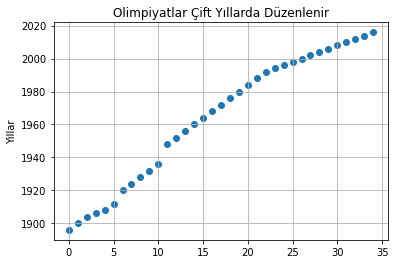

In [115]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yillar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [116]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi= pd.to_datetime(veri_zaman["Year"],format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: Year, dtype: datetime64[ns]

In [117]:
veri_zaman["tarih_saat"]= tarih_saat_nesnesi
veri_zaman.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [118]:
veri_zaman= veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["Year"],axis=1, inplace=True)
veri_zaman

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi


In [119]:
periyodik_veri=veri_zaman.resample("2A").mean() # 2 yıllık periyotlar halinde ortalama alıyor
periyodik_veri.head()

,Age,Height,Weight
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [120]:
periyodik_veri.dropna(axis=0 , inplace= True)
periyodik_veri.head()

,Age,Height,Weight
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

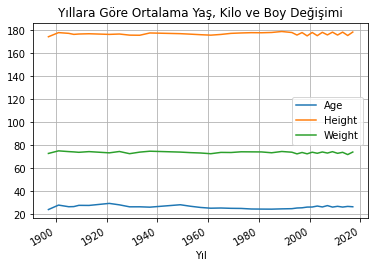

In [121]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara Göre Ortalama Yaş, Kilo ve Boy Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

Yıllara Göre Madalya Değişimi

In [123]:
veri_zaman=pd.get_dummies(veri_zaman, columns=["Medal"])
veri_zaman.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [124]:
periyodik_veri=veri_zaman.resample("2A").sum()
periyodik_veri.head()
#kayıp verileri çıkaralım:
periyodik_veri=periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

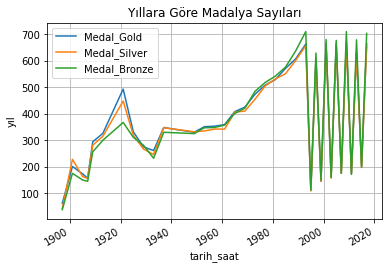

In [125]:
plt.figure()
periyodik_veri.loc[:,["Medal_Gold","Medal_Silver","Medal_Bronze"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.ylabel("yıl")
plt.grid(True)
plt.show()

Yıllara ve Sezonlara Göre Madalya Sayıları

In [128]:
yaz = veri_zaman[veri_zaman.Season== "Summer"]
kis = veri_zaman[veri_zaman.Season== "Winter"]
kis.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [129]:
periyodik_veri_yaz=yaz.resample("A").sum()
periyodik_veri_yaz=periyodik_veri_yaz[~(periyodik_veri_yaz== 0).any(axis=1)]
periyodik_veri_yaz.head(3)

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0


In [133]:
periyodik_veri_kis=kis.resample("A").sum()
periyodik_veri_kis=periyodik_veri_kis[~(periyodik_veri_kis== 0).any(axis=1)]
periyodik_veri_kis.head(3)

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32


<Figure size 432x288 with 0 Axes>

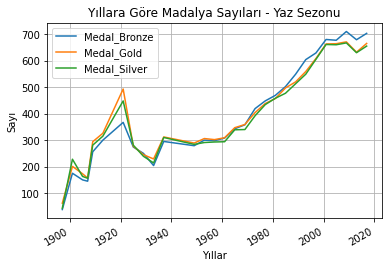

<Figure size 432x288 with 0 Axes>

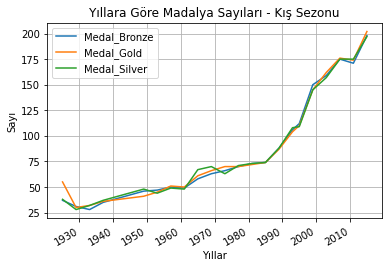

In [134]:
plt.figure()
periyodik_veri_yaz.loc[:,["Medal_Bronze","Medal_Gold","Medal_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıllar")
plt.grid(True)
plt.show()


plt.figure()
periyodik_veri_kis.loc[:,["Medal_Bronze","Medal_Gold","Medal_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıllar")
plt.grid(True)
plt.show()